# Кластеризация

Определим схожие группы банковских клиентов

Загрузим библиотеки

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()

#import math as mth
from scipy import stats as st
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import ttest_ind_from_stats
import numpy as np
import seaborn as sns; sns.set()
cm = sns.light_palette("green", as_cmap=True)


#
import plotly.express as px # для визуализации данных
import matplotlib.pyplot as plt 
#import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.graph_objects as go
#from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
#from plotly.colors import n_colors
#import plotly.figure_factory as ff


#
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.metrics import roc_auc_score
#from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

from sklearn.manifold import TSNE # для снижения размерности с помощью t-SNE
from sklearn.datasets import load_digits # для данных MNIST


#
#import requests
##import StringIO
#import re
#from collections import defaultdict
%autosave 60

Autosaving every 60 seconds


In [2]:
try:
    data = pd.read_csv('/datasets/cc_data.csv')
except:
    url = 'https://raw.githubusercontent.com/skd2314/datasets/main/cc_data.csv'

    data = pd.read_csv(url)

In [3]:
list_df = (data,)
for list_df in list_df:
    print('\033[31m' + '______________info_____________________' + '\033[0m')
    display(list_df.info())
    print('\033[31m' + '______________describe_________________' + '\033[0m')
    display(list_df.describe().T)
    print('\033[31m' + '______________head_____________________' + '\033[0m')
    display(list_df.head(10))
    print('\033[31m' + '______________sample___________________' + '\033[0m')
    display(list_df.sample(10))
    print('\033[31m' + '______________tail_____________________' + '\033[0m')
    display(list_df.tail(10))
    print('\033[31m' + '_____________isna______________________' + '\033[0m')
    display(list_df.isna().sum().reset_index())
    print('\033[31m' + '_____________duplicated________________' + '\033[0m')
    display(list_df.duplicated().sum())
    print('\033[31m' + '__количество пропущенных значений по каждому из столбцов__' + '\033[0m')
    display(list_df.isnull().mean().reset_index())

______________info_____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX             

None

______________describe_________________


count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

______________head_____________________


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

______________sample___________________


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
7348  C17547   842.103869           1.000000     496.56              0.00   
8089  C18308  2784.030599           1.000000    1470.00           1021.73   
1437  C11485    67.321840           1.000000     685.15            567.65   
710   C10737  5422.456378           1.000000       0.00              0.00   
4932  C15070    15.810927           0.363636     246.29            246.29   
4161  C14277  1044.704008           1.000000    1142.60            346.00   
3777  C13885   290.175484           1.000000     345.17            219.80   
5148  C15293    50.853021           1.000000     428.75              0.00   
7881  C18095   465.003141           1.000000     500.00            500.00   
1456  C11504   965.605202           1.000000     215.00            215.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
7348                  496.56      0.000000             1.000000   
8089                  448.27   3149.955535             1.000000   
1437                  117.50      0.000000             1.000000   
710                     0.00   9972.234861             0.000000   
4932                    0.00      0.000000             0.181818   
4161                  796.60      0.000000             1.000000   
3777                  125.37      0.000000             0.636364   
5148                  428.75      0.000000             1.000000   
7881                    0.00      0.000000             0.111111   
1456                    0.00      0.000000             0.250000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
7348                    0.000000                          1.000000   
8089                    0.636364                          0.636364   
1437                    1.000000                          0.416667   
710                     0.000000                          0.000000   
4932                    0.181818                          0.000000   
4161                    0.333333                          1.000000   
3777                    0.181818                          0.545455   
5148                    0.000000                          1.000000   
7881                    0.111111                          0.000000   
1456                    0.250000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
7348                0.000000                 0             12        1000.0   
8089                0.636364                15             35        7000.0   
1437                0.000000                 0             20        9000.0   
710                 0.166667                 2              0       14000.0   
4932                0.000000                 0              4         500.0   
4161                0.000000                 0             61        5000.0   
3777                0.000000                 0             11        6000.0   
5148                0.000000                 0             18        8000.0   
7881                0.000000                 0              1        1000.0   
1456                0.000000                 0              3        1000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
7348   254.599294        467.881962          0.000000      12  
8089   745.850159        623.905482          0.000000      11  
1437   526.120039        169.900038          0.300000      12  
710   1661.693077       1949.814235          0.000000      12  
4932   149.886496         23.323100          0.000000      11  
4161  1881.871223        249.300419          0.083333      12  
3777   376.607432        184.176753          0.000000      11  
5148   319.919021        107.187821          0.090909      12  
7881   109.818409        357.651724          0.000000       9  
1456   398.080493        718.175953          0.000000      12

______________tail_____________________


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8940  C19181   130.838554           1.000000     591.24              0.00   
8941  C19182  5967.475270           0.833333     214.55              0.00   
8942  C19183    40.829749           1.000000     113.28              0.00   
8943  C19184     5.871712           0.500000      20.90             20.90   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8940                  591.24      0.000000             1.000000   
8941                  214.55   8555.409326             0.833333   
8942                  113.28      0.000000             1.000000   
8943                    0.00      0.000000             0.166667   
8944                    0.00      0.000000             0.333333   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8940                    0.000000                          0.833333   
8941                    0.000000                          0.666667   
8942                    0.000000                          0.833333   
8943                    0.166667                          0.000000   
8944                    0.333333                          0.000000   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8940                0.000000                 0              6        1000.0   
8941                0.666667                13              5        9000.0   
8942                0.000000                 0              6        1000.0   
8943                0.000000                 0              1         500.0   
8944                0.000000                 0              2        4000.0   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8940  475.523262         82.771320              1.00       6  
8941  966.202912        861.949906              0.00       6  
8942   94.488828         86.283101              0.25       6  
8943   58.644883         43.473717              0.00       6  
8944    0.000000               NaN              0.00       6  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

_____________isna______________________


index    0
0                            CUST_ID    0
1                            BALANCE    0
2                  BALANCE_FREQUENCY    0
3                          PURCHASES    0
4                   ONEOFF_PURCHASES    0
5             INSTALLMENTS_PURCHASES    0
6                       CASH_ADVANCE    0
7                PURCHASES_FREQUENCY    0
8         ONEOFF_PURCHASES_FREQUENCY    0
9   PURCHASES_INSTALLMENTS_FREQUENCY    0
10            CASH_ADVANCE_FREQUENCY    0
11                  CASH_ADVANCE_TRX    0
12                     PURCHASES_TRX    0
13                      CREDIT_LIMIT    1
14                          PAYMENTS    0
15                  MINIMUM_PAYMENTS  313
16                  PRC_FULL_PAYMENT    0
17                            TENURE    0

_____________duplicated________________


0

__количество пропущенных значений по каждому из столбцов__


index         0
0                            CUST_ID  0.000000
1                            BALANCE  0.000000
2                  BALANCE_FREQUENCY  0.000000
3                          PURCHASES  0.000000
4                   ONEOFF_PURCHASES  0.000000
5             INSTALLMENTS_PURCHASES  0.000000
6                       CASH_ADVANCE  0.000000
7                PURCHASES_FREQUENCY  0.000000
8         ONEOFF_PURCHASES_FREQUENCY  0.000000
9   PURCHASES_INSTALLMENTS_FREQUENCY  0.000000
10            CASH_ADVANCE_FREQUENCY  0.000000
11                  CASH_ADVANCE_TRX  0.000000
12                     PURCHASES_TRX  0.000000
13                      CREDIT_LIMIT  0.000112
14                          PAYMENTS  0.000000
15                  MINIMUM_PAYMENTS  0.034972
16                  PRC_FULL_PAYMENT  0.000000
17                            TENURE  0.000000

In [4]:
data['CUST_ID'].describe().to_frame()

CUST_ID
count     8950
unique    8950
top     C10001
freq         1

In [5]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

Сгруппируем по `BALANCE` и `PURCHASES`

In [6]:

group_balance = data.groupby(['CUST_ID','BALANCE'])\
                                                .agg({'PURCHASES': 'sum'}).reset_index()\
                                                .sort_values(by='PURCHASES', ascending=False)
group_balance.head(10)


CUST_ID       BALANCE  PURCHASES
550   C10574  11547.520010   49039.57
501   C10523  13479.288210   41050.40
1256  C11300   4010.621974   40040.71
1604  C11657   3391.702180   38902.71
3937  C14048   2997.977825   35131.16
273   C10284   5131.319584   32539.78
1641  C11695   3454.094319   31299.35
587   C10611   2492.726282   27957.68
3698  C13802   3012.178613   27790.42
7046  C17237   2980.054695   26784.62

Сгруппируем по величине `PURCHASES`

In [7]:
count_pur = data.groupby(['CUST_ID']).agg({'PURCHASES':'sum'}).reset_index()\
                                           .sort_values(by='PURCHASES', ascending=False)
count_pur.columns=['CUST_ID', 'PURCHASES'] #переименуем столбцы
count_pur.head()

CUST_ID  PURCHASES
550   C10574   49039.57
501   C10523   41050.40
1256  C11300   40040.71
1604  C11657   38902.71
3937  C14048   35131.16

In [8]:

fig = go.Figure()
fig.add_trace(go.Box(
    y=data["PURCHASES"],
    name=" ",
    boxpoints='outliers', # only outliers
    marker_color='#33d9b2',
    line_color='#218c74'
))

fig.update_layout(xaxis_tickangle=0,
        title={
        'text': 'Диаграмма размаха величины платежа',
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [9]:
round(data['PURCHASES'].mean(), 3)

1003.205

Медианный платеж 361.28\
Средний платеж 1003.2

В данных по латежам есть выбросы


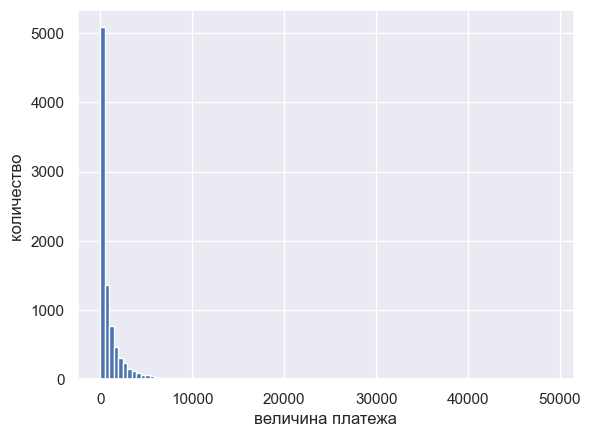

In [10]:
data.PURCHASES.hist(bins=100)
plt.xlabel('величина платежа')
plt.ylabel("количество ")
plt.show()

In [11]:
y = data.PURCHASES.copy()
for i in range(1,17):
    print('price corr with {}: {}'.format(data.columns[i], data[data.columns[i]].corr(y)))
    

price corr with BALANCE: 0.18126074335076992
price corr with BALANCE_FREQUENCY: 0.1336744373457342
price corr with PURCHASES: 1.0
price corr with ONEOFF_PURCHASES: 0.9168445587151447
price corr with INSTALLMENTS_PURCHASES: 0.6798962203562016
price corr with CASH_ADVANCE: -0.05147421969340187
price corr with PURCHASES_FREQUENCY: 0.3930174275339071
price corr with ONEOFF_PURCHASES_FREQUENCY: 0.49842973283276304
price corr with PURCHASES_INSTALLMENTS_FREQUENCY: 0.3155666861960518
price corr with CASH_ADVANCE_FREQUENCY: -0.1201431921551245
price corr with CASH_ADVANCE_TRX: -0.06717528502515108
price corr with PURCHASES_TRX: 0.6895608345245263
price corr with CREDIT_LIMIT: 0.3569631364027891
price corr with PAYMENTS: 0.6032638314010624
price corr with MINIMUM_PAYMENTS: 0.09385971313676914
price corr with PRC_FULL_PAYMENT: 0.18037906032501644


по некоторым значения корреляция более 0.5

In [12]:
ylog = np.log(y)
for i in range(1, 17):
    print('log(PURCHASES) corr with {}: {}'.format(data.columns[i], data[data.columns[i]].corr(ylog)))

log(PURCHASES) corr with BALANCE: nan
log(PURCHASES) corr with BALANCE_FREQUENCY: nan
log(PURCHASES) corr with PURCHASES: nan
log(PURCHASES) corr with ONEOFF_PURCHASES: nan
log(PURCHASES) corr with INSTALLMENTS_PURCHASES: nan
log(PURCHASES) corr with CASH_ADVANCE: nan
log(PURCHASES) corr with PURCHASES_FREQUENCY: nan
log(PURCHASES) corr with ONEOFF_PURCHASES_FREQUENCY: nan
log(PURCHASES) corr with PURCHASES_INSTALLMENTS_FREQUENCY: nan
log(PURCHASES) corr with CASH_ADVANCE_FREQUENCY: nan
log(PURCHASES) corr with CASH_ADVANCE_TRX: nan
log(PURCHASES) corr with PURCHASES_TRX: nan
log(PURCHASES) corr with CREDIT_LIMIT: nan
log(PURCHASES) corr with PAYMENTS: nan
log(PURCHASES) corr with MINIMUM_PAYMENTS: nan
log(PURCHASES) corr with PRC_FULL_PAYMENT: nan


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



Посмотрим на возможные признаки кластеризации

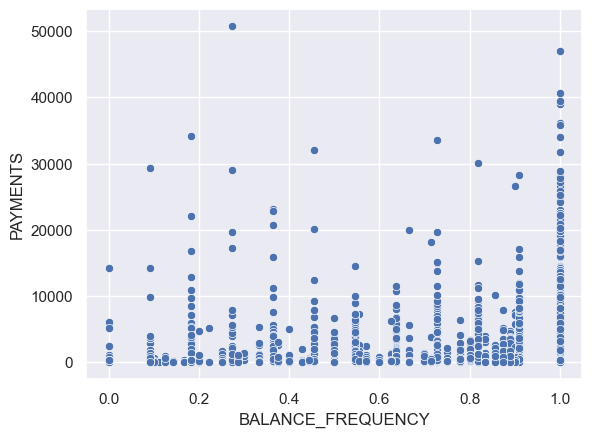

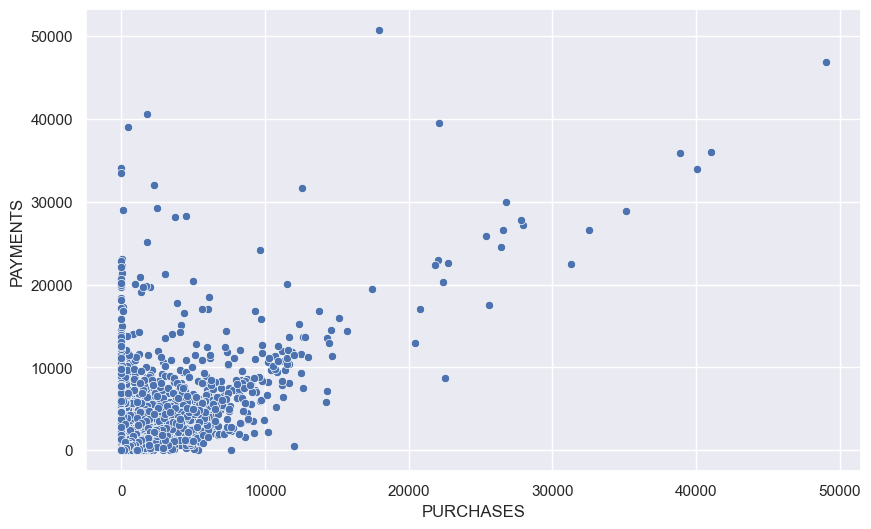

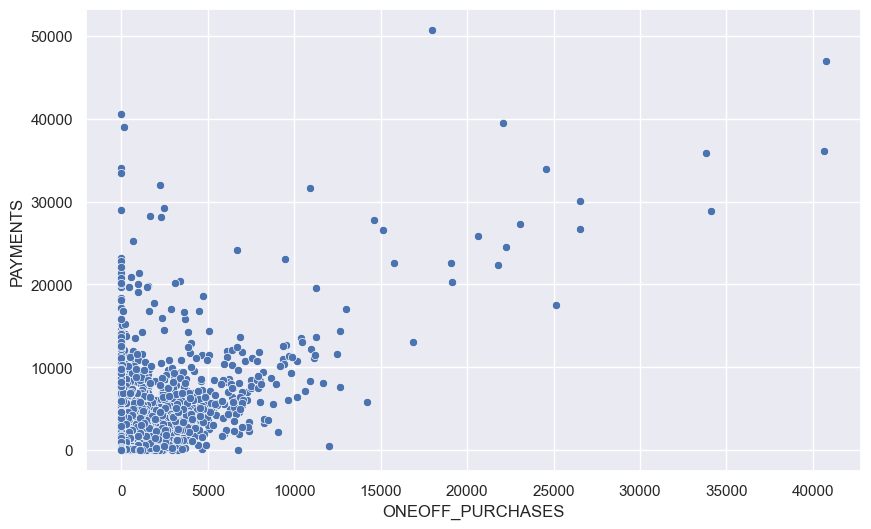

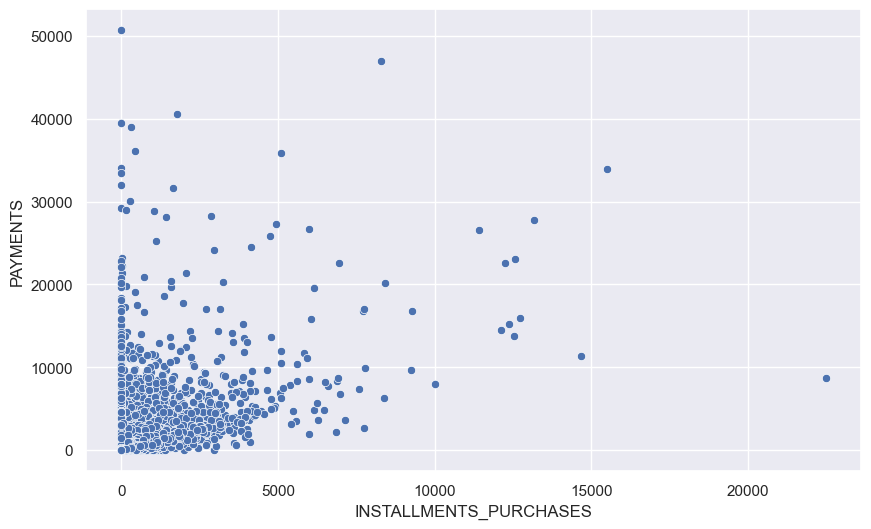

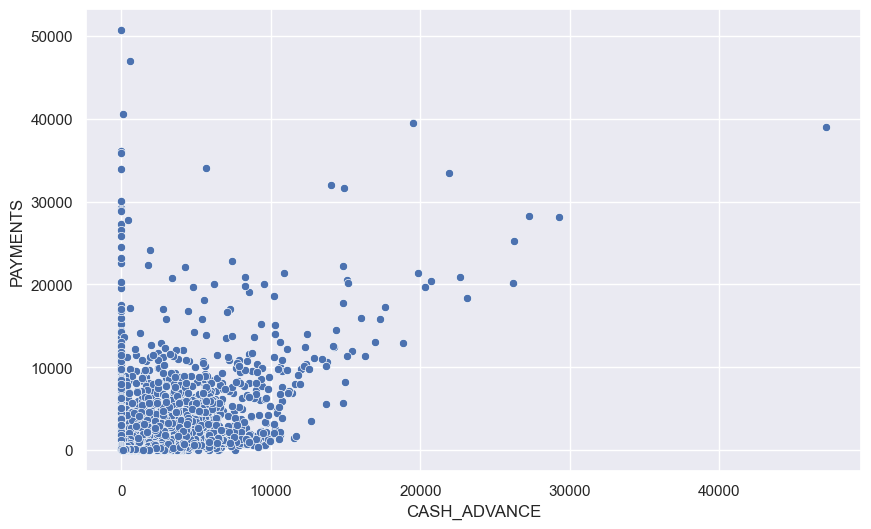

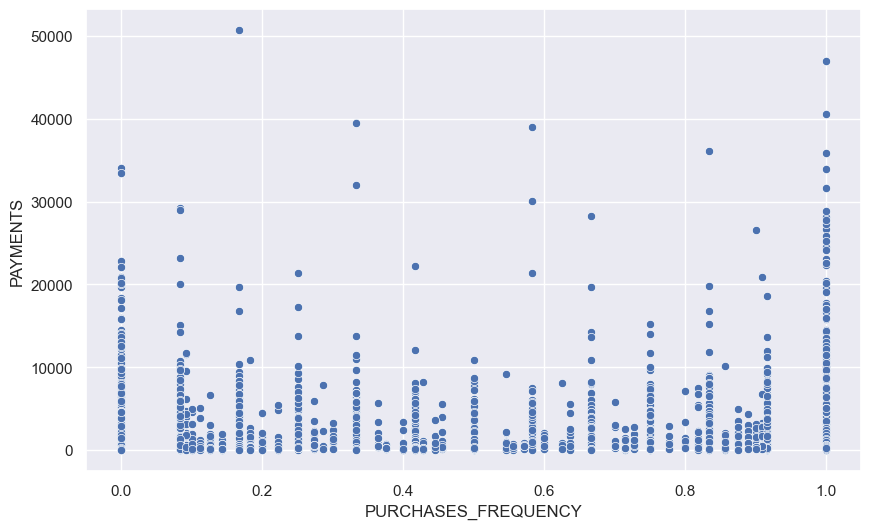

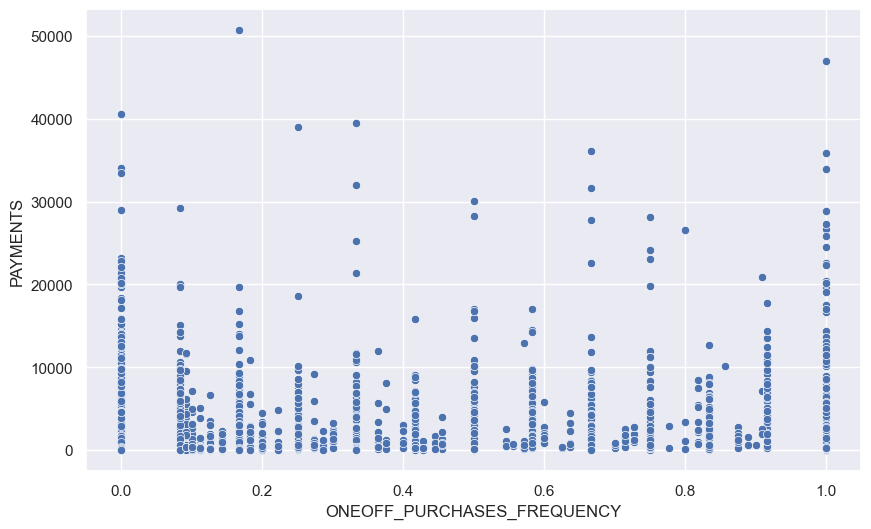

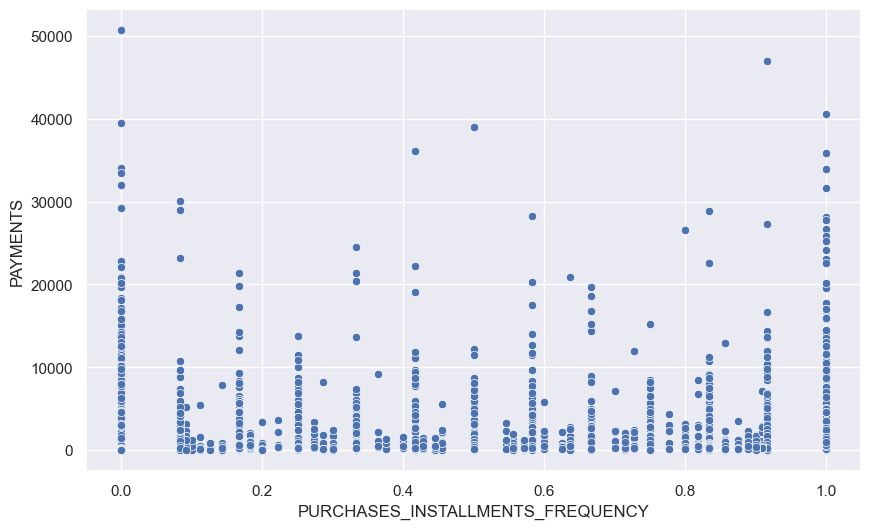

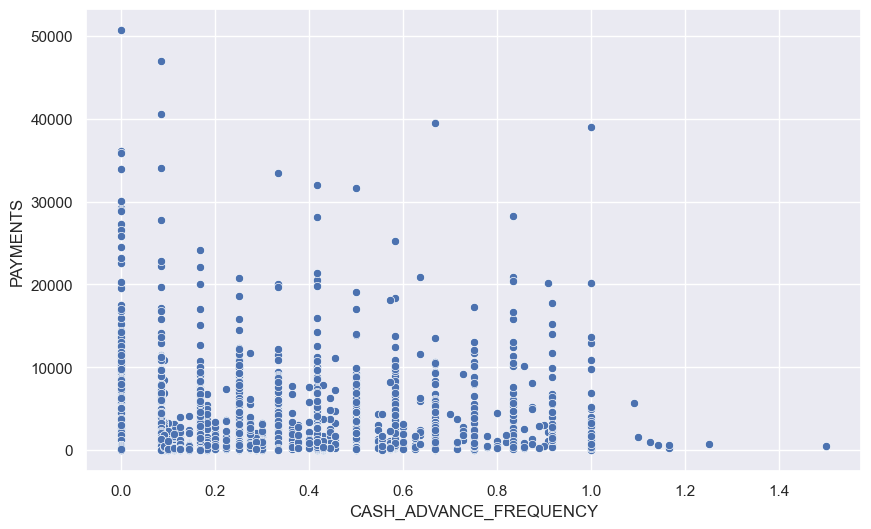

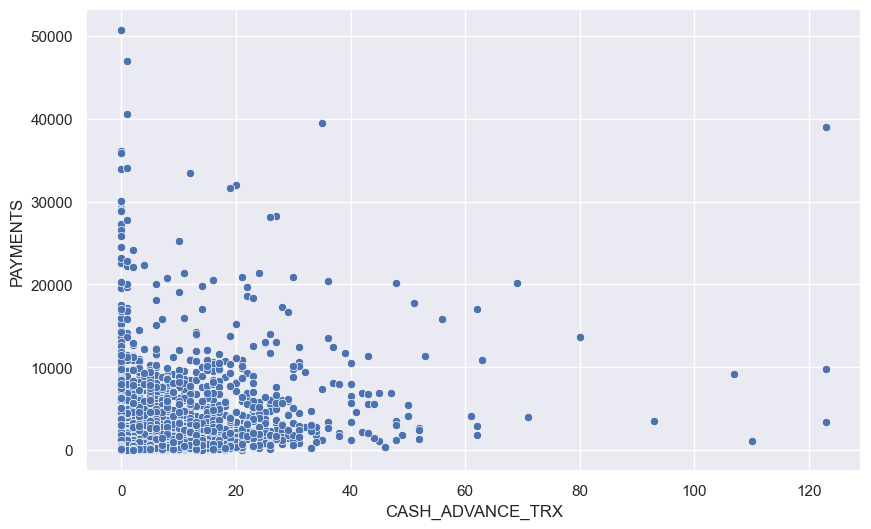

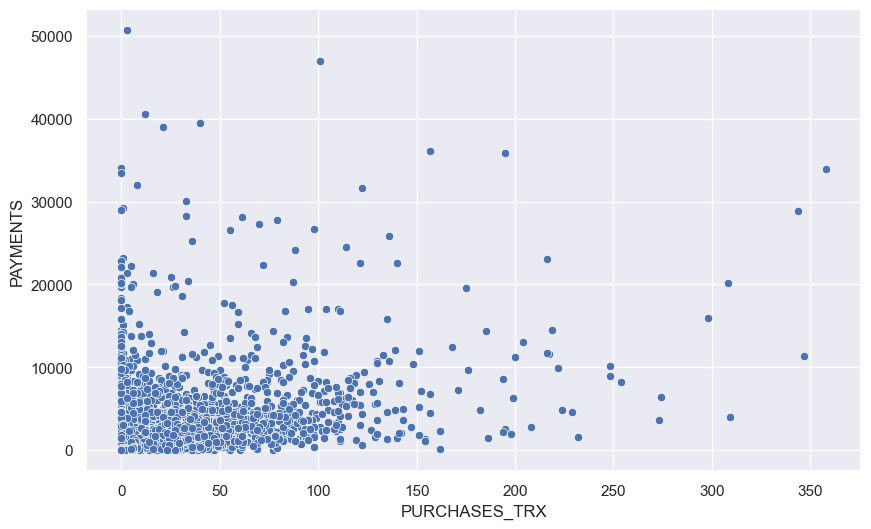

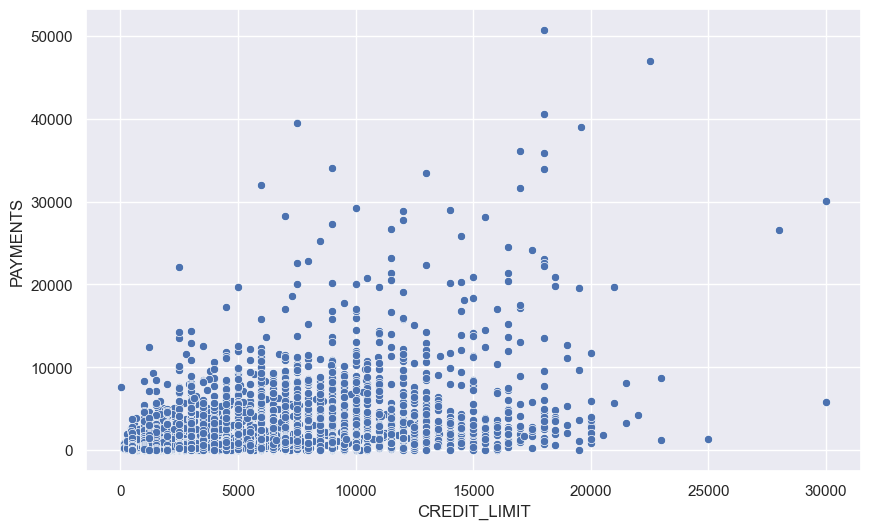

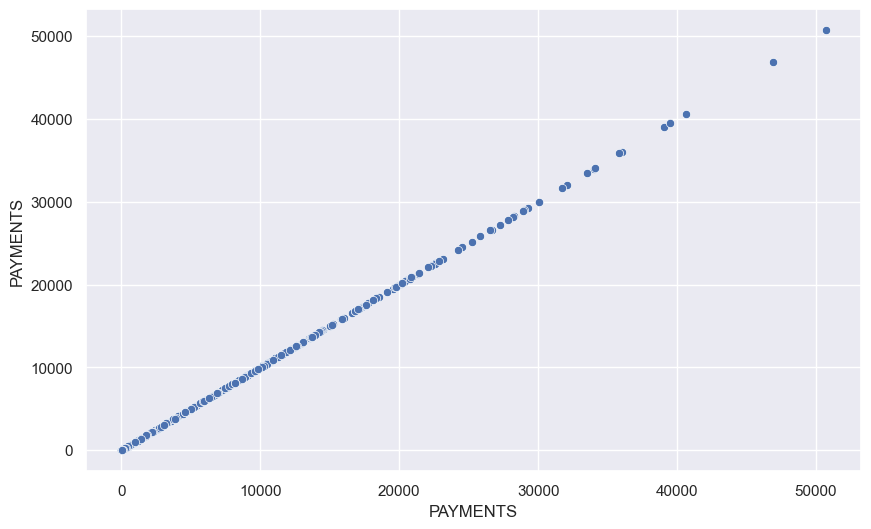

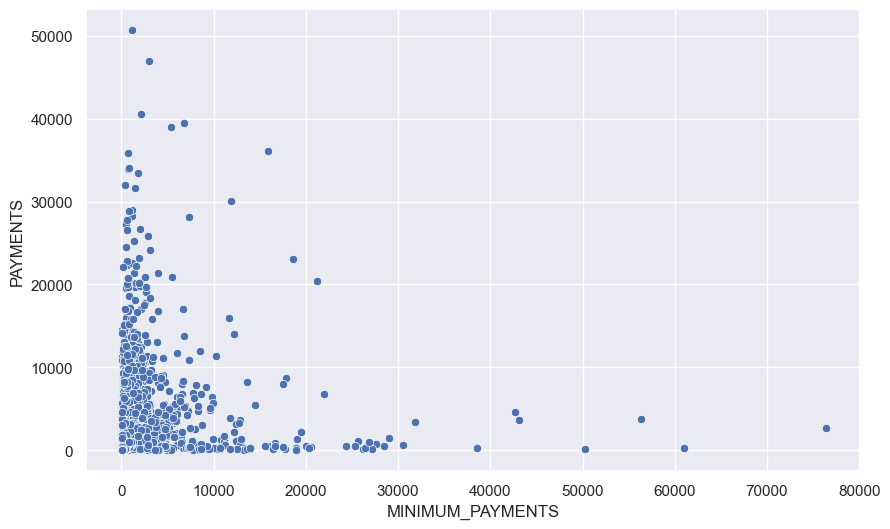

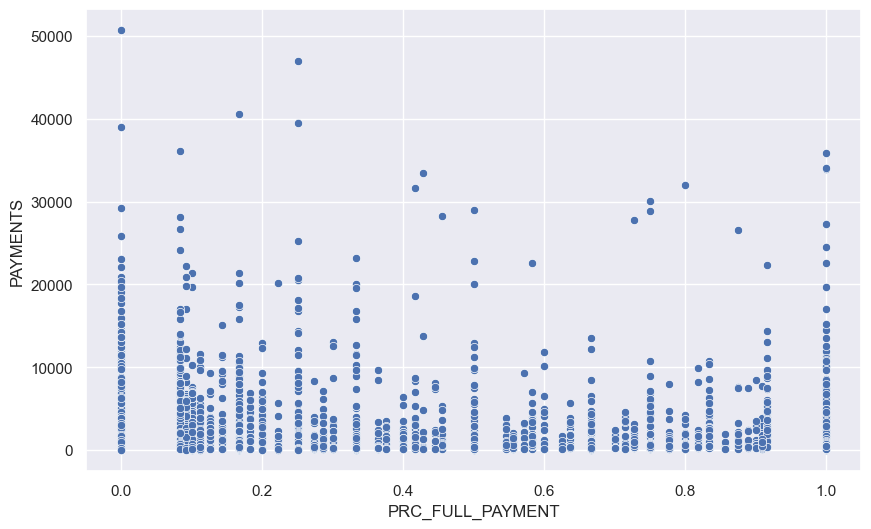

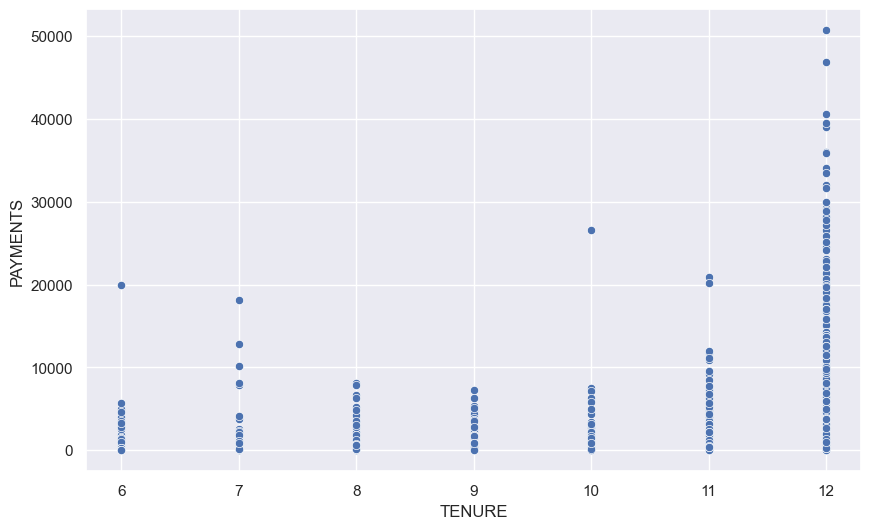

In [13]:
for col in data.columns[2:]:
    sns.scatterplot(x=col, y='PAYMENTS', data=data) 
    sns.set(rc={'figure.figsize':(10, 6)})
    plt.show()

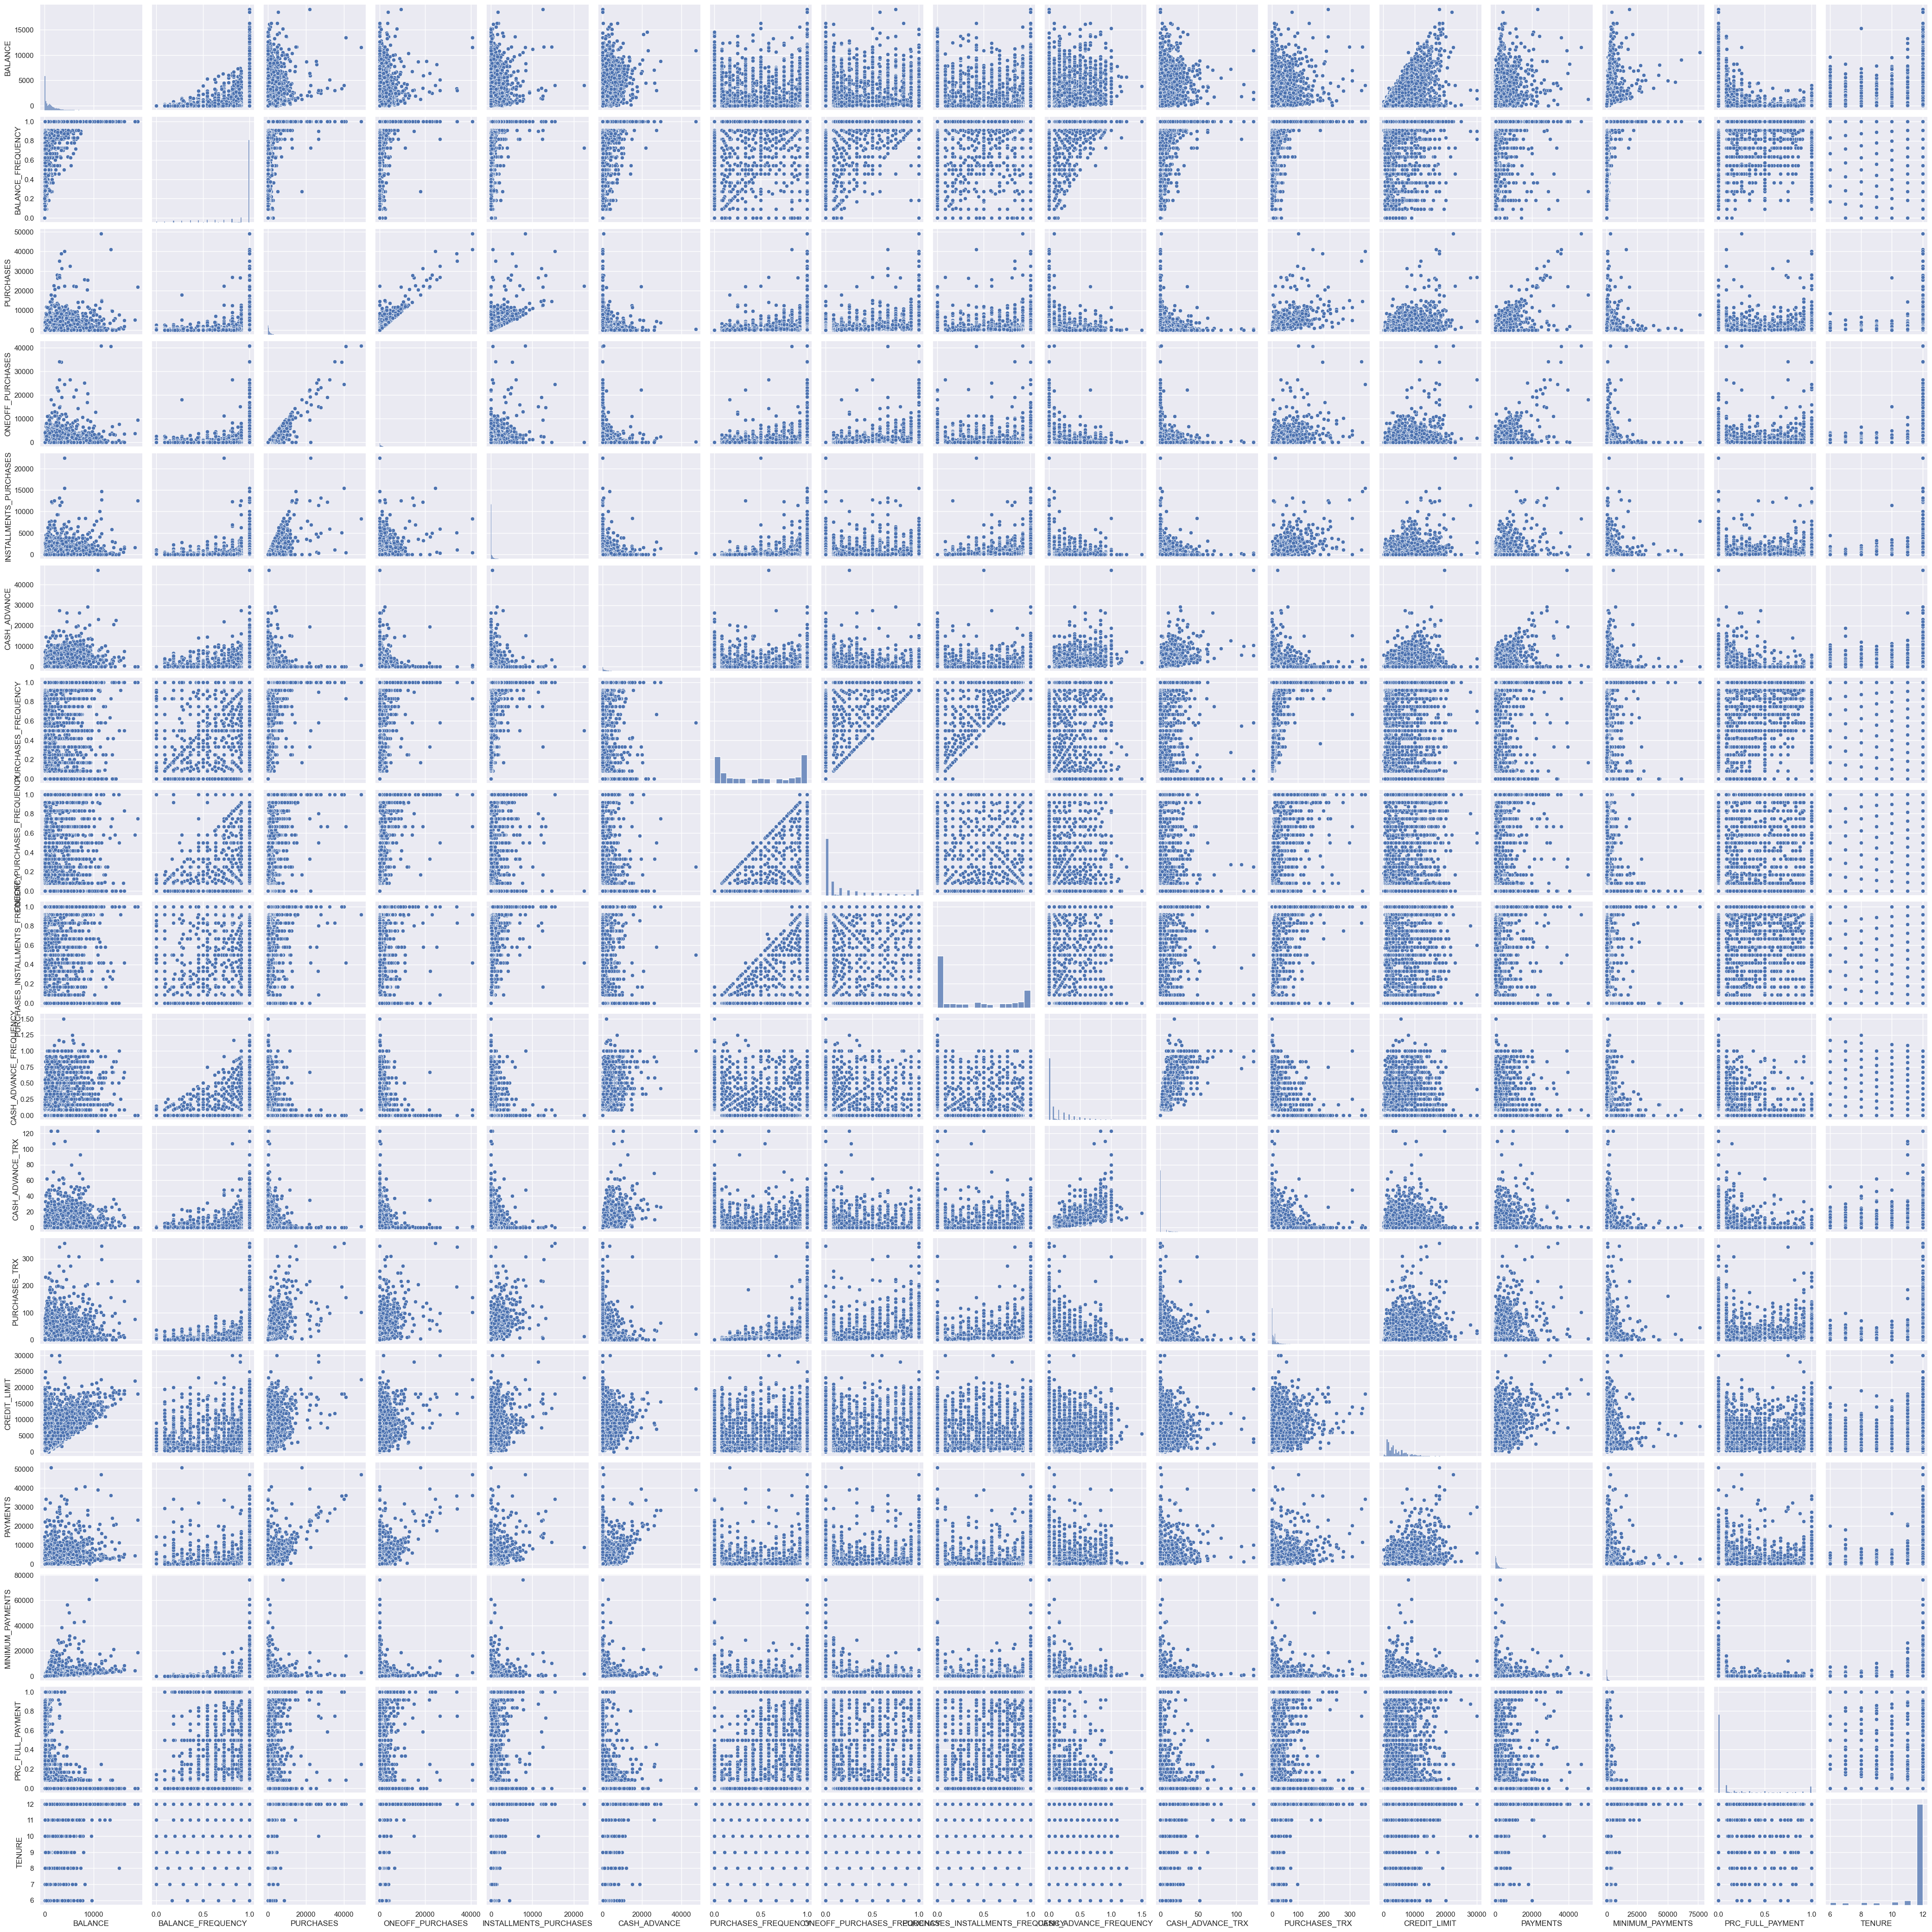

In [14]:
sns.pairplot(data)
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Построим матрицу корреляций

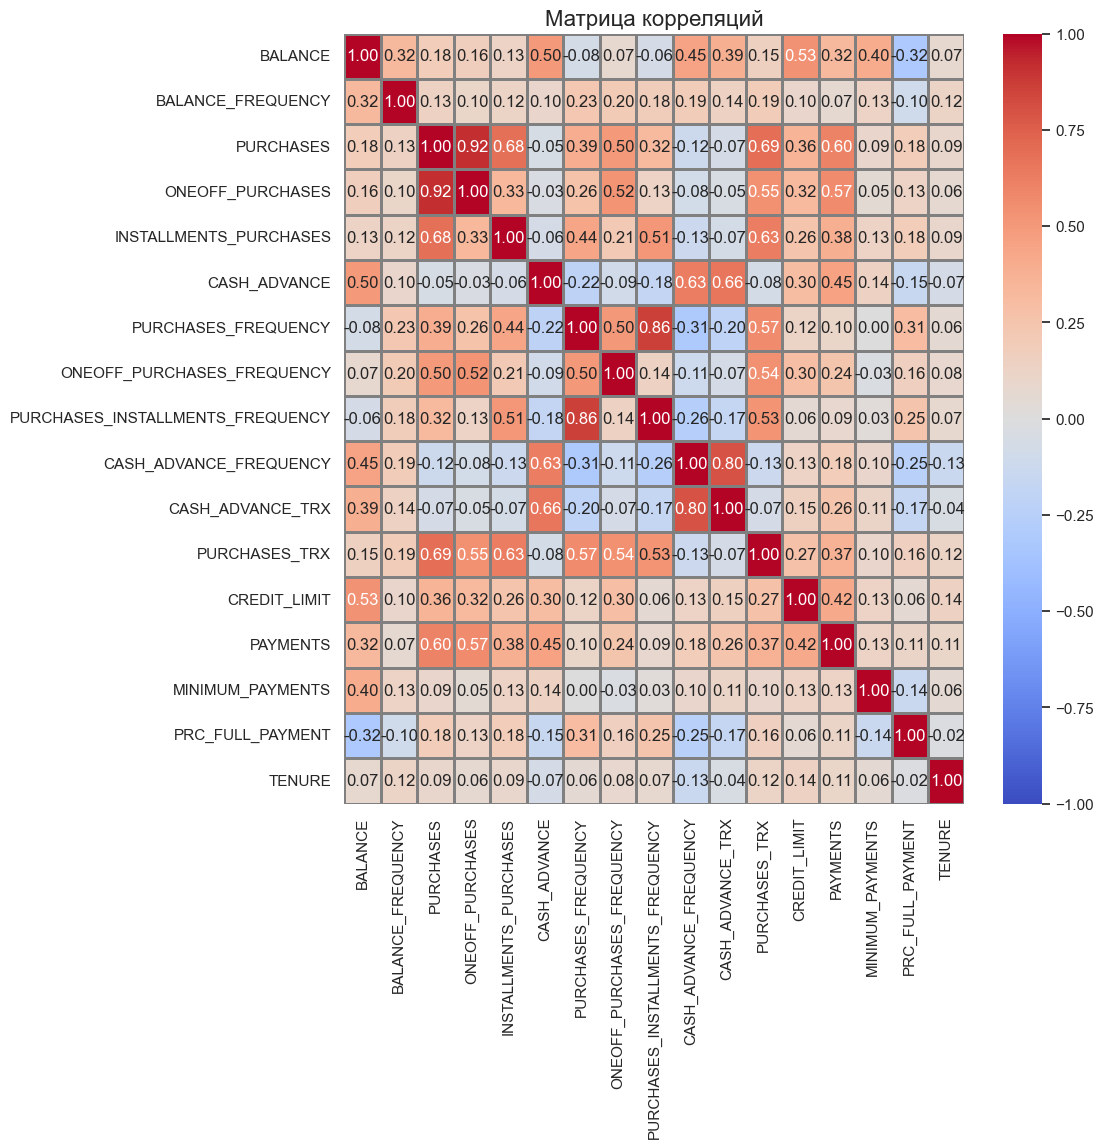

In [16]:
cm = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, fmt='.2f', vmin=-1, annot = True, linewidths=1, linecolor='gray', cmap='coolwarm')
plt.title('Матрица корреляций', fontsize = 16)
#plt.ylabel('Признаки', fontsize=15)
#plt.xlabel('Признаки', fontsize=15)
plt.show()

Удалим `NaN` из датасета

In [17]:
data_clean = data.drop(['MINIMUM_PAYMENTS', 'CREDIT_LIMIT'], axis=1)

Обучим модель кластеризации на основании алгоритма `K-Means` и спрогнозируем кластеры клиентов

Для создания рабочей модели необходимо удалить колонку `CUST_ID`


In [18]:
X = data_clean.drop(['CUST_ID'], axis=1)
y = data_clean['CUST_ID']

Разделим данные на признаки (матрица X) и целевую переменную (y)

In [19]:
# обязательная стандартизация данных перед работой с алгоритмами 
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Построим матрицу расстояний функцией `linkage()`на стандартизованной матрице признаков, нарисовам дендрограмму

In [20]:
linked = linkage(X_sc, method = 'ward')

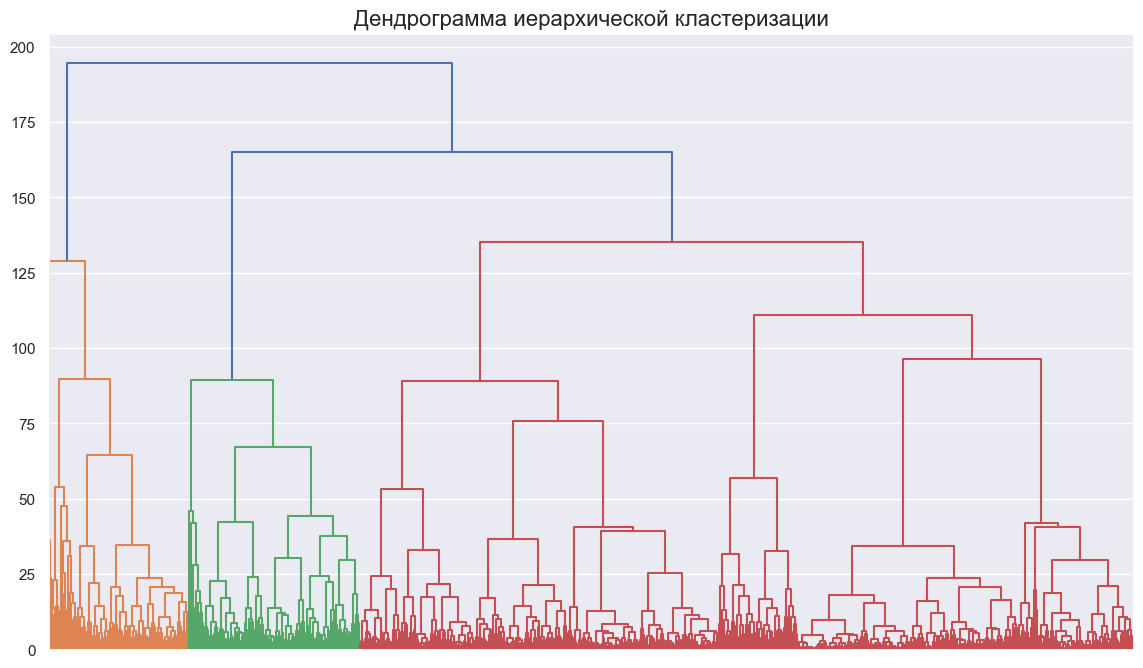

In [21]:
plt.figure(figsize=(14, 8))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Дендрограмма иерархической кластеризации', fontsize=16)
plt.show() 

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

Определим оптимальное число кластеров

In [22]:
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
#X = load_iris().data
#y = load_iris().target 
for n_cluster in range(2, 15): 
    kmeans = KMeans(n_clusters=n_cluster).fit(X_sc) 
    label = kmeans.labels_ 
    sil_coeff = silhouette_score(X_sc, label, metric='euclidean').round(5)
    print("Для n_clusters={}, Коэффициент силуэта равен {}".format(n_cluster, sil_coeff))

/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=2, Коэффициент силуэта равен 0.22871


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=3, Коэффициент силуэта равен 0.20787


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=4, Коэффициент силуэта равен 0.21747


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=5, Коэффициент силуэта равен 0.21709


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=6, Коэффициент силуэта равен 0.23004


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=7, Коэффициент силуэта равен 0.23885


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=8, Коэффициент силуэта равен 0.2537


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=9, Коэффициент силуэта равен 0.2422


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=10, Коэффициент силуэта равен 0.24041


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=11, Коэффициент силуэта равен 0.24637


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=12, Коэффициент силуэта равен 0.22384


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=13, Коэффициент силуэта равен 0.23243


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Для n_clusters=14, Коэффициент силуэта равен 0.23192


/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_km

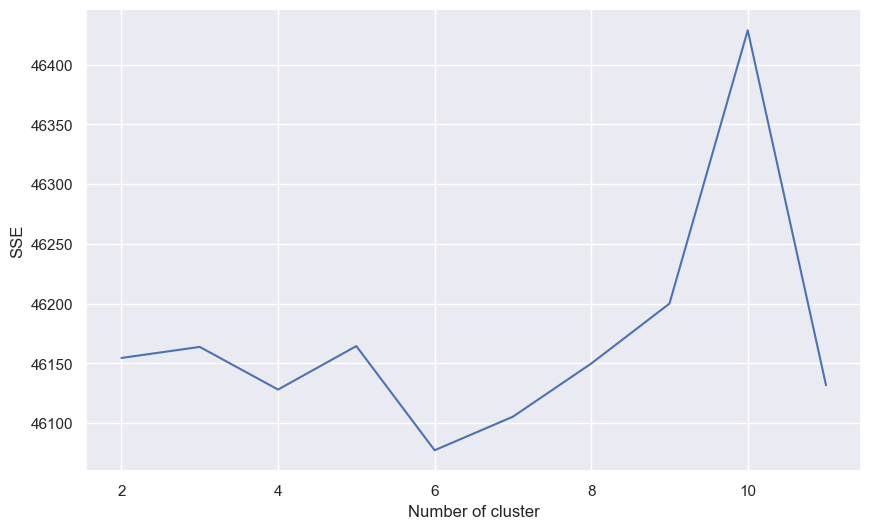

In [23]:
iris = load_iris()
#X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
#data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(2, 12):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_sc) 
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

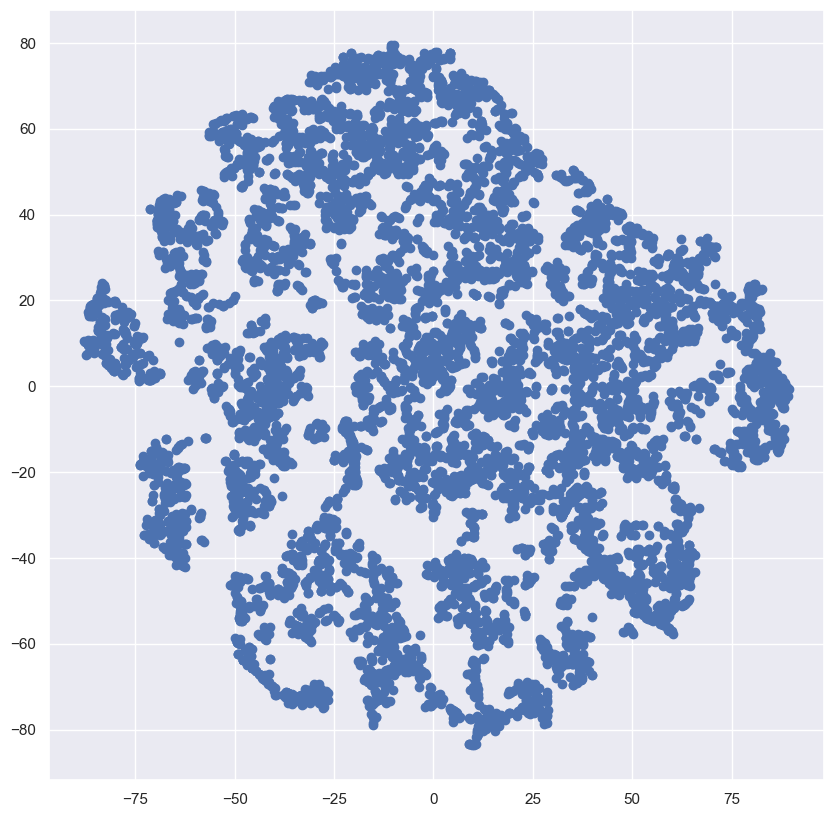

In [24]:

tsne = TSNE(random_state=15)
tsne_representation = tsne.fit_transform(X_sc)
plt.figure(figsize=(10, 10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

За число кластеров примем `n=10`

In [25]:
n = 10
km = KMeans(n_clusters = n, random_state=0) # задаём число кластеров,
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [26]:
# сохраняем метки кластера в поле нашего датасета
data_clean['cluster_km'] = labels

Характеризуем отделимость кластера от других
* Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация

In [27]:
silhouette_score(X_sc, labels).round(5)

0.24362

Отобразим средние значения признаков кластеров

In [28]:
# выводим статистику по средним значениям наших признаков по кластеру
clusters = data_clean.groupby('cluster_km').mean(numeric_only=True).round(0).T
clusters

cluster_km                             0       1       2       3       4  \
BALANCE                             97.0  4233.0  1260.0  1275.0  1466.0   
BALANCE_FREQUENCY                    1.0     1.0     1.0     1.0     1.0   
PURCHASES                          953.0   357.0  1007.0  2176.0   248.0   
ONEOFF_PURCHASES                   172.0   230.0   281.0  1766.0   201.0   
INSTALLMENTS_PURCHASES             782.0   128.0   727.0   410.0    47.0   
CASH_ADVANCE                        22.0  3612.0   328.0   295.0   611.0   
PURCHASES_FREQUENCY                  1.0     0.0     1.0     1.0     0.0   
ONEOFF_PURCHASES_FREQUENCY           0.0     0.0     0.0     1.0     0.0   
PURCHASES_INSTALLMENTS_FREQUENCY     1.0     0.0     1.0     0.0     0.0   
CASH_ADVANCE_FREQUENCY               0.0     0.0     0.0     0.0     0.0   
CASH_ADVANCE_TRX                     0.0    13.0     1.0     1.0     2.0   
PURCHASES_TRX                       17.0     6.0    21.0    30.0     3.0   
PAYMENTS                          1069.0  2425.0  1277.0  2128.0   946.0   
PRC_FULL_PAYMENT                     1.0     0.0     0.0     0.0     0.0   
TENURE                              12.0    12.0    12.0    12.0    12.0   

cluster_km                             5        6       7       8        9  
BALANCE                           3628.0   5377.0   907.0   107.0   5448.0  
BALANCE_FREQUENCY                    1.0      1.0     1.0     0.0      1.0  
PURCHASES                         6537.0   1186.0   376.0   322.0  27917.0  
ONEOFF_PURCHASES                  3770.0    747.0   245.0   203.0  22354.0  
INSTALLMENTS_PURCHASES            2769.0    439.0   132.0   120.0   5562.0  
CASH_ADVANCE                       608.0  11237.0  1159.0   329.0    970.0  
PURCHASES_FREQUENCY                  1.0      0.0     0.0     0.0      1.0  
ONEOFF_PURCHASES_FREQUENCY           1.0      0.0     0.0     0.0      1.0  
PURCHASES_INSTALLMENTS_FREQUENCY     1.0      0.0     0.0     0.0      1.0  
CASH_ADVANCE_FREQUENCY               0.0      1.0     0.0     0.0      0.0  
CASH_ADVANCE_TRX                     2.0     31.0     3.0     1.0      2.0  
PURCHASES_TRX                       96.0     14.0     5.0     4.0    128.0  
PAYMENTS                          5830.0  12439.0   586.0  1168.0  27762.0  
PRC_FULL_PAYMENT                     0.0      0.0     0.0     0.0      1.0  
TENURE                              12.0     12.0     7.0    12.0     12.0

Определим статистическую значимость различий в средней выручке между кластерами

Применим критерий и отформатируем `p-value`, округлив его до трёх знаков после запятой:

- `Н0` - Статистически значимых различий в `PURCHASES` нет
- `Н1` - Статистически значимые различия в `PURCHASES` есть


Объявим переменные `cluster` в соответствии с их `PURCHASES` значениями

In [29]:
cluster0 = data_clean.query('cluster_km==0')['PURCHASES']
cluster1 = data_clean.query('cluster_km==1')['PURCHASES']
cluster2 = data_clean.query('cluster_km==2')['PURCHASES']
cluster3 = data_clean.query('cluster_km==3')['PURCHASES']
cluster4 = data_clean.query('cluster_km==4')['PURCHASES']
cluster5 = data_clean.query('cluster_km==5')['PURCHASES']
cluster6 = data_clean.query('cluster_km==6')['PURCHASES']
cluster7 = data_clean.query('cluster_km==7')['PURCHASES']
cluster8 = data_clean.query('cluster_km==8')['PURCHASES']
cluster9 = data_clean.query('cluster_km==9')['PURCHASES']



Проведем тест «U-критерий Манна-Уитни»

In [30]:
alpha = 0.05 #критический уровень статистической значимости 

clusters = [cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8, cluster9]
cluster_list = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9']

bonferroni_alpha = alpha / 10 #произведено 10 сравнений

for index_0 in range(len(clusters)):
    for index_1 in range(index_0+1, len(clusters)):
        p_value = st.mannwhitneyu(clusters[index_0], clusters[index_1], alternative='two-sided')[1]
#        p_value = st.ttest_ind(clusters[index_0], clusters[index_1], equal_var=False, )[1]
#        p_value = st.levene(clusters[index_0], clusters[index_1], )[1]
        
        print('Кластеры', cluster_list[index_0], cluster_list[index_1])
        print('p_value: {:.3f}'.format(p_value))
        print('Покупки группы A: {:.0f}'.format(clusters[index_0].mean()))
        print('Покупки группы B: {:.0f}'.format(clusters[index_1].mean()))
        
        if p_value < bonferroni_alpha:
            print('\033[31m' + 'Отвергаем нулевую гипотезу: разница статистически значима\n'+ '\033[0m')
        else:
            print('\033[32m' + 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя\n'+ '\033[0m')

Кластеры cluster0 cluster1
p_value: 0.000
Покупки группы A: 953
Покупки группы B: 357
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры cluster0 cluster2
p_value: 0.082
Покупки группы A: 953
Покупки группы B: 1007
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя

Кластеры cluster0 cluster3
p_value: 0.000
Покупки группы A: 953
Покупки группы B: 2176
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры cluster0 cluster4
p_value: 0.000
Покупки группы A: 953
Покупки группы B: 248
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры cluster0 cluster5
p_value: 0.000
Покупки группы A: 953
Покупки группы B: 6537
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры cluster0 cluster6
p_value: 0.000
Покупки группы A: 953
Покупки группы B: 1186
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры cluster0 cluster7
p_value: 0.000
Покупки группы A: 953
Покупки группы B: 376
Отвергаем нулевую гипот

Схожие группы: 0 и 2, 1 и 4, 6 и 7, 6 и 8, 7 и 8 